In [48]:
import pandas as pd 
import numpy as np 

name_1880 = pd.read_csv("data/babynames/yob1880.txt", names=["name", "gender", "births"])
name_1880

,name,gender,births
0,Mary,F,7065
1,Anna,F,2604
2,Emma,F,2003
3,Elizabeth,F,1939
4,Minnie,F,1746
...,...,...,...
1995,Woodie,M,5
1996,Worthy,M,5
1997,Wright,M,5
1998,York,M,5


In [49]:
name_1880.groupby("gender").births.sum()

gender
F     90993
M    110493
Name: births, dtype: int64

In [91]:
years = range(1880, 2011)
pieces = []
columns = ["name", "gender", "births"]

for year in years:
    path = "data/babynames/yob{}.txt".format(year)
    frame = pd.read_csv(path, names= columns)
    frame["year"] = year
    pieces.append(frame)

names = pd.concat(pieces, ignore_index= True)   # 프레임끼리 합치기
names                                           # ignore_index= True : 인덱스를 무시하고 합침

,name,gender,births,year
0,Mary,F,7065,1880
1,Anna,F,2604,1880
2,Emma,F,2003,1880
3,Elizabeth,F,1939,1880
4,Minnie,F,1746,1880
...,...,...,...,...
1690779,Zymaire,M,5,2010
1690780,Zyonne,M,5,2010
1690781,Zyquarius,M,5,2010
1690782,Zyran,M,5,2010


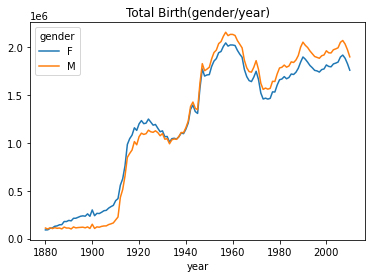

In [92]:
total_births = names.pivot_table("births", index= "year", columns= "gender", aggfunc= sum)  # 피봇테이블
total_births.plot(title= "Total Birth(gender/year)")

In [52]:
def add_prop(group):
    group["prop"] = group.births / group.births.sum()
    return group

In [94]:
names = names.groupby(["year", "gender"]).apply(add_prop)
names

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
1690779,Zymaire,M,5,2010,0.000003
1690780,Zyonne,M,5,2010,0.000003
1690781,Zyquarius,M,5,2010,0.000003
1690782,Zyran,M,5,2010,0.000003


In [106]:
names.groupby(["year", "gender"]).prop.sum()

year  gender
1880  F         1.0
      M         1.0
1881  F         1.0
      M         1.0
1882  F         1.0
               ... 
2008  M         1.0
2009  F         1.0
      M         1.0
2010  F         1.0
      M         1.0
Name: prop, Length: 262, dtype: float64

In [107]:
# 연도별 / 성별에 따른 선호하는 이름 1000개 추출
def get_top1000(group):
    return group.sort_values(by= "births", ascending= False)[:1000]

grouped = names.groupby(["year", "gender"])
top1000 = grouped.apply(get_top1000)
top1000

name gender  births  year      prop
year gender                                                  
1880 F      0             Mary      F    7065  1880  0.077643
            1             Anna      F    2604  1880  0.028618
            2             Emma      F    2003  1880  0.022013
            3        Elizabeth      F    1939  1880  0.021309
            4           Minnie      F    1746  1880  0.019188
...                        ...    ...     ...   ...       ...
2010 M      1677639     Camilo      M     194  2010  0.000102
            1677640     Destin      M     194  2010  0.000102
            1677641     Jaquan      M     194  2010  0.000102
            1677642     Jaydan      M     194  2010  0.000102
            1677645     Maxton      M     193  2010  0.000102

[261877 rows x 5 columns]

In [108]:
top1000.reset_index(inplace=True, drop=True)
top1000

,name,gender,births,year,prop
0,Mary,F,7065,1880,0.077643
1,Anna,F,2604,1880,0.028618
2,Emma,F,2003,1880,0.022013
3,Elizabeth,F,1939,1880,0.021309
4,Minnie,F,1746,1880,0.019188
...,...,...,...,...,...
261872,Camilo,M,194,2010,0.000102
261873,Destin,M,194,2010,0.000102
261874,Jaquan,M,194,2010,0.000102
261875,Jaydan,M,194,2010,0.000102


In [109]:
# 상위 1000개의 이름데이터를 남자(boys)와 여자(girls)로 분리
boys = top1000[top1000.gender == 'M']
girls = top1000[top1000.gender == 'F']

In [110]:
# 연도와 출생수를 피봇테이블로 변환
total_births = top1000.pivot_table("births", index= "year", columns= "name", aggfunc= sum)
total_births

name,Aaden,Aaliyah,Aarav,Aaron,Aarush,Ab,Abagail,Abb,Abbey,Abbie,...,Zoa,Zoe,Zoey,Zoie,Zola,Zollie,Zona,Zora,Zula,Zuri
year,,,,,,,,,,,,,,,,,,,,,
1880,NaN,NaN,NaN,102.0,NaN,NaN,NaN,NaN,NaN,71.0,...,8.0,23.0,NaN,NaN,7.0,NaN,8.0,28.0,27.0,NaN
1881,NaN,NaN,NaN,94.0,NaN,NaN,NaN,NaN,NaN,81.0,...,NaN,22.0,NaN,NaN,10.0,NaN,9.0,21.0,27.0,NaN
1882,NaN,NaN,NaN,85.0,NaN,NaN,NaN,NaN,NaN,80.0,...,8.0,25.0,NaN,NaN,9.0,NaN,17.0,32.0,21.0,NaN
1883,NaN,NaN,NaN,105.0,NaN,NaN,NaN,NaN,NaN,79.0,...,NaN,23.0,NaN,NaN,10.0,NaN,11.0,35.0,25.0,NaN
1884,NaN,NaN,NaN,97.0,NaN,NaN,NaN,NaN,NaN,98.0,...,13.0,31.0,NaN,NaN,14.0,6.0,8.0,58.0,27.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006,NaN,3737.0,NaN,8279.0,NaN,NaN,297.0,NaN,404.0,440.0,...,NaN,5145.0,2839.0,530.0,NaN,NaN,NaN,NaN,NaN,NaN
2007,NaN,3941.0,NaN,8914.0,NaN,NaN,313.0,NaN,349.0,468.0,...,NaN,4925.0,3028.0,526.0,NaN,NaN,NaN,NaN,NaN,NaN
2008,955.0,4028.0,219.0,8511.0,NaN,NaN,317.0,NaN,344.0,400.0,...,NaN,4764.0,3438.0,492.0,NaN,NaN,NaN,NaN,NaN,NaN


In [111]:
total_births.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 131 entries, 1880 to 2010
Columns: 6868 entries, Aaden to Zuri
dtypes: float64(6868)
memory usage: 6.9 MB


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000027189A94B20>,
      dtype=object)

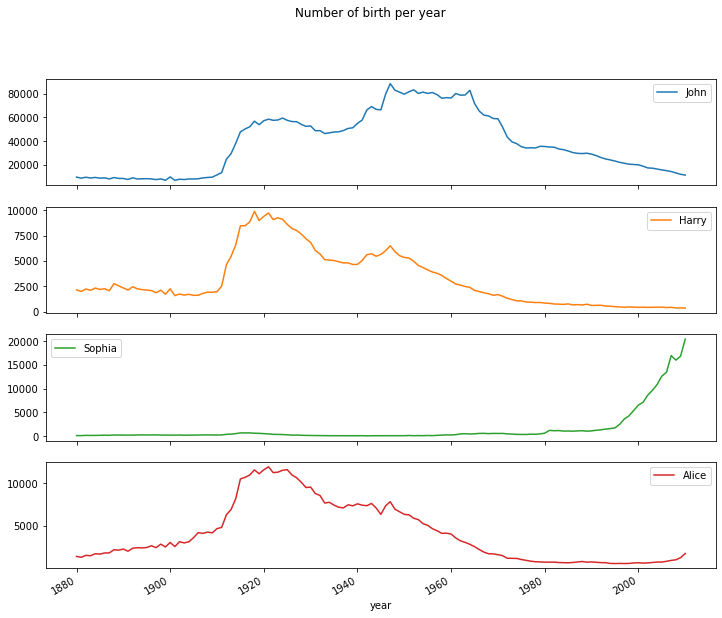

In [112]:
subset = total_births[["John", "Harry", "Sophia", "Alice"]]
subset.plot(subplots=True, figsize=(12,10), grid=False, title="Number of birth per year")

<Figure size 432x288 with 0 Axes>

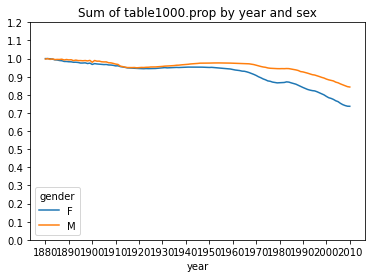

In [113]:
import matplotlib.pyplot as plt
plt.figure()
table = top1000.pivot_table("prop", index="year", columns="gender", aggfunc=sum)
table.plot(title='Sum of table1000.prop by year and sex',
           yticks=np.linspace(0, 1.2, 13), xticks=range(1880, 2020, 10))

In [129]:
df = boys[boys.year == 2010]
prop_cumsum = df.sort_values(by="prop", ascending=False).prop.cumsum()
prop_cumsum
prop_cumsum.values.searchsorted(0.5)

30

In [126]:
df = boys[boys.year == 1910]
y1910 = df.sort_values(by="prop", ascending=False).prop.cumsum()
y1910.values.searchsorted(0.5)+1

31

<Figure size 432x288 with 0 Axes>

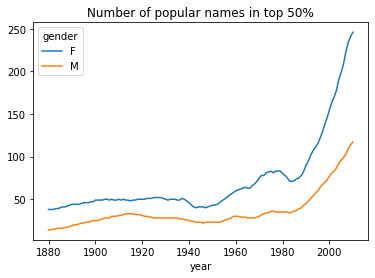

In [130]:
def get_quantile_count(group, q=0.5):
    group = group.sort_values(by='prop', ascending=False)
    return group.prop.cumsum().values.searchsorted(q) + 1

diversity = top1000.groupby(['year', 'gender']).apply(get_quantile_count)
diversity = diversity.unstack('gender')
fig = plt.figure()
diversity.plot(title="Number of popular names in top 50%")

In [131]:
# 마지막 글자의 변화
get_last_letter = lambda x : x[-1]
last_letters = names.name.map(get_last_letter)
last_letters.name = "last_letter"

table = names.pivot_table("births", index= last_letters, columns=["gender", "year"], aggfunc= sum)
subtable = table.reindex(columns=[1910, 1960, 2010], level="year")
subtable

gender              F                            M                    
year             1910      1960      2010     1910      1960      2010
last_letter                                                           
a            108376.0  691247.0  670605.0    977.0    5204.0   28438.0
b                 NaN     694.0     450.0    411.0    3912.0   38859.0
c                 5.0      49.0     946.0    482.0   15476.0   23125.0
d              6750.0    3729.0    2607.0  22111.0  262112.0   44398.0
e            133569.0  435013.0  313833.0  28655.0  178823.0  129012.0
f                 NaN      20.0      97.0    152.0    9224.0    2255.0
g                57.0     318.0     657.0    437.0   20235.0    2666.0
h             20427.0   73247.0  133424.0   8848.0   80841.0   98090.0
i               605.0   80812.0   55820.0    164.0    1286.0   42956.0
j                 NaN       NaN     159.0      NaN       NaN    1459.0
k                48.0     315.0     626.0   7104.0  105315.0   35198.0
l             17121.0   68482.0   46360.0  12626.0  223716.0  133583.0
m               476.0   17417.0    4552.0  11272.0   72139.0   46808.0
n             31412.0  264258.0  246631.0  27851.0  325266.0  688677.0
o               658.0    4932.0    2187.0   3314.0   27358.0   81025.0
p                 7.0      47.0      35.0    616.0   12102.0    2409.0
q                 NaN       NaN      53.0      NaN       NaN     342.0
r              5308.0   13677.0   31707.0  12522.0   66183.0  166064.0
s             15477.0   25810.0   23451.0  25404.0  219080.0  123670.0
t             10877.0   30738.0   13773.0  14153.0  140015.0   43398.0
u               271.0    1161.0     734.0     24.0     122.0    2318.0
v                 NaN     122.0     205.0     22.0      78.0    2723.0
w                 8.0      63.0    2080.0   1229.0   16444.0   30656.0
x                 6.0      74.0    1279.0    770.0    3947.0   16352.0
y             43991.0  308504.0  205501.0  15021.0  343318.0  110425.0
z               967.0    1333.0    1238.0     33.0     392.0    3476.0

In [82]:
letter_prop = subtable / subtable.sum()

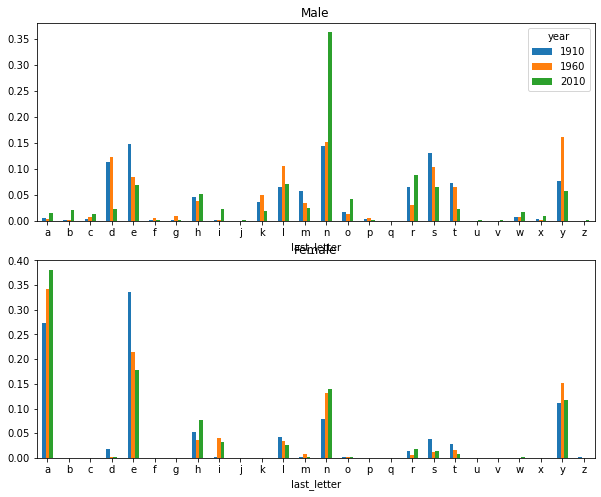

In [83]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 1, figsize=(10, 8))
letter_prop['M'].plot(kind='bar', rot=0, ax=axes[0], title='Male')
letter_prop['F'].plot(kind='bar', rot=0, ax=axes[1], title='Female',
                      legend=False)

In [85]:
letter_prop = table/ table.sum()
dny_ts = letter_prop.loc[["d", "n", "y"], 'M'].T
dny_ts.head()

last_letter,d,n,y
year,,,
1880,0.083055,0.153213,0.075760
1881,0.083247,0.153214,0.077451
1882,0.085340,0.149560,0.077537
1883,0.084066,0.151646,0.079144
1884,0.086120,0.149915,0.080405


<Figure size 432x288 with 0 Axes>

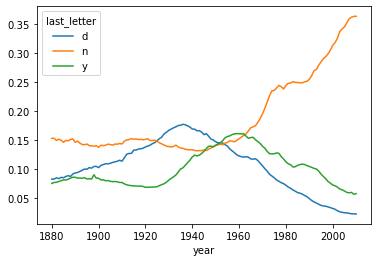

In [87]:
plt.close()
fig = plt.figure()
dny_ts.plot()

In [101]:
# 남자이름 -> 여자이름
# Lesley or Leslie
# 공퉁부분 : Lesi
all_names = pd.Series(top1000.name.unique())
lesley_like  = all_names[all_names.str.lower().str.contains("lesl")]
lesley_like

632     Leslie
2294    Lesley
4262    Leslee
4728     Lesli
6103     Lesly
dtype: object

In [103]:
filtered = top1000[top1000.name.isin(lesley_like)]
filtered.groupby("name").births.sum()

name
Leslee      1082
Lesley     35022
Lesli        929
Leslie    370429
Lesly      10067
Name: births, dtype: int64

In [104]:
table = filtered.pivot_table('births', index='year',
                             columns='gender', aggfunc='sum')
table = table.div(table.sum(1), axis=0)
table.tail()

gender,F,M
year,,
2006,1.0,NaN
2007,1.0,NaN
2008,1.0,NaN
2009,1.0,NaN
2010,1.0,NaN


<Figure size 432x288 with 0 Axes>

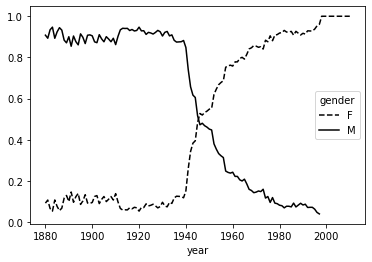

In [105]:
fig = plt.figure()
table.plot(style={'M': 'k-', 'F': 'k--'})